# Heart_Diseases
* ## Paolo Di Simone, Matr: 584638 
* ## Andrea de Donato, Matr: 536795

In [2]:
import pandas as pd

df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Data Analysis

In [20]:
data = df.copy()
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column 

[0.07910917 0.05776815 0.11830771 0.0776643  0.09320917 0.0369378
 0.04100269 0.09982605 0.14083958 0.0987515  0.15658387]


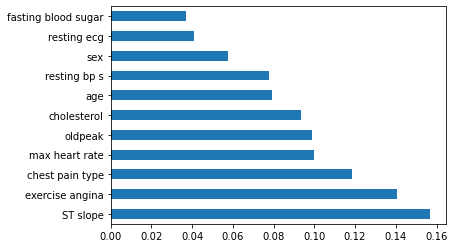

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<AxesSubplot:>

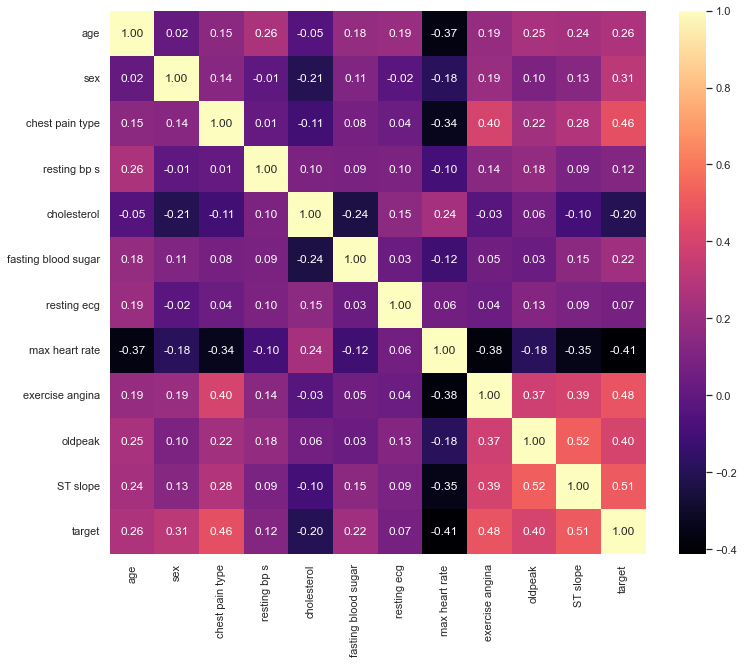

In [23]:
import seaborn as sns
sns.set_theme(style="white")
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

## Data Visualization

In [60]:
df2 = df.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

df2['target'] = df2['target'].apply(chng2)

def chng3(cpt):
    if cpt == 1:
        return 'Typical angina'
    elif cpt == 2:
        return 'Atypical angina'
    elif cpt == 3:
        return 'Non-anginal pain'
    else:
        return 'Asymptomatic'

df2['chest pain type'] = df2['chest pain type'].apply(chng3)

def chng4(ea):
    if ea == 1:
        return 'Yes'
    else:
        return 'No'

df2['exercise angina'] = df2['exercise angina'].apply(chng4)


def chng5(re):
    if re == 0:
        return 'Normal'
    elif re == 1:
        return '''ST-T wave
        abnormality '''
    else:
        return '''Left ventricular
        hypertrophy'''

df2['resting ecg'] = df2['resting ecg'].apply(chng5)


def chng6(sts):
    if sts == 1:
        return 'upsloping'
    elif sts == 2:
        return 'flat'
    else:
        return 'downsloping'

df2['ST slope'] = df2['ST slope'].apply(chng6)

Text(0.5, 1.0, 'Gender v/s target\n')

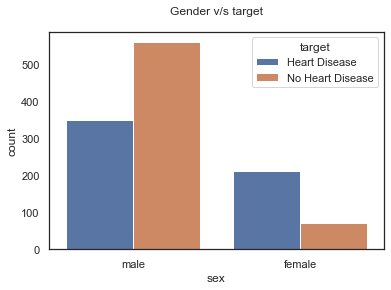

In [28]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

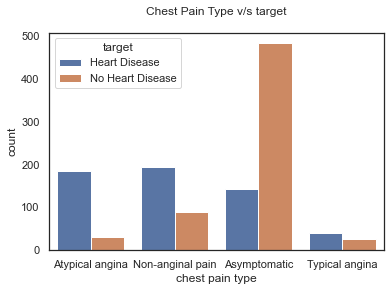

In [29]:
sns.countplot(data= df2, x='chest pain type',hue='target')
plt.title('Chest Pain Type v/s target\n')

Text(0.5, 1.0, 'Exercise Angina v/s target\n')

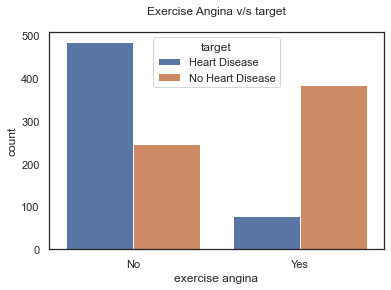

In [34]:
sns.countplot(data= df2, x='exercise angina',hue='target')
plt.title('Exercise Angina v/s target\n')

Text(0.5, 1.0, 'Resting ecg v/s target\n')

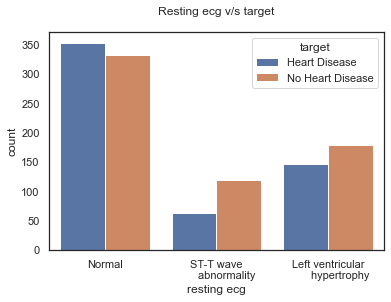

In [50]:
sns.countplot(data= df2, x='resting ecg',hue='target')
plt.title('Resting ecg v/s target\n')

Text(0.5, 1.0, 'ST slope v/s target\n')

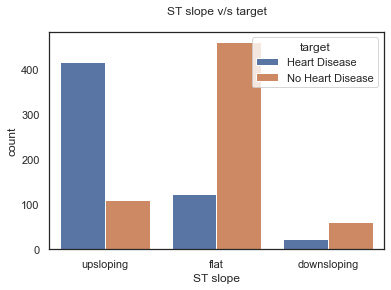

In [61]:
sns.countplot(data= df2, x='ST slope',hue='target')
plt.title('ST slope v/s target\n')